<a href="https://colab.research.google.com/github/elephantcastle/machine-learning-grokking/blob/main/05_Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision trees

**Decision tree**: A machine learning model based on yes-or-no questions and represented by a binary tree. The tree has a root node, decision nodes, leaf nodes, and branches.

**Root node** The topmost node of the tree. It contains the first yes-or-no question. For convenience, we refer to it as the root. 

**Decision node** Each yes-or-no question in our model is represented by a decision node, with two branches emanating from it (one for the “yes” answer, and one for the “no”
answer).

**Leaf node** A node that has no branches emanating from it. These represent the decisions we make after traversing the tree. For convenience, we refer to them as leaves.

**branch** The two edges emanating from each decision node, corresponding to the “yes” and “no” answers to the question in the node. In this chapter, by convention, the branch to the left corresponds to “yes” and the branch to the right to “no.”

**Depth** The number of levels in the decision tree. Alternatively, it is the number of branches on the longest path from the root node to a leaf node.

Let use this dateset and build a decision tree.
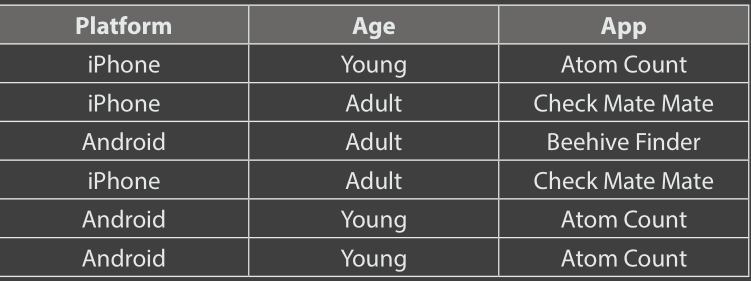

We could split by age or platform and then choose the one reccomended the most for each leaf.

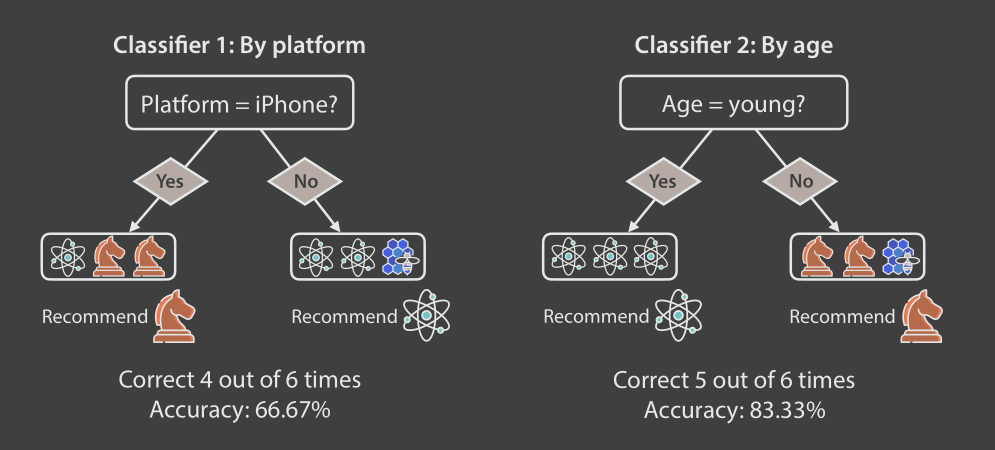

To compare different splits we can use these 3 methods:

*   Accuracy: ratio correct on total answers
*   Gini impurity: a measure of diversity in a dataset. 
*   Entropy:

**Gini impurity**: Given $m$ items in $n$ different classes. $Gini = 1 – p_1^2 – p_2^2 – … – p_n^2$; this is the probability of picking $2$ items of different classes in the set, where $p_i= \frac{i_a}{m}$ represents the probability of choosing 2 items of the class.
Pure set have Gini 0.  

**Gini average index**: it is the average of the Gini index on different splits in the decision tree; a lower average Gini index is better.

Entropy: Given $m$ items in $n$ different classes.  $Entropy= –p_1 log_2(p_1) – p_2log_2(p_2) – … – p_n log_2(p_n)$ where $p_i= \frac{i_a}{m}$ represents the probability of choosing 2 items of the class.

*We can further subdivide the dataset and improve the classification in node where the labels are not all the same, its accuracy is not 100%, and its Gini index and entropy are both not 0.*

These conditions provide an useful guide on the splitting.
1. Don’t split a node if the change in accuracy, Gini index, or entropy is below some
threshold.
2. Don’t split a node if it has less than a certain number of samples.
3. Split a node only if both of the resulting leaves contain at least a certain number of
samples.
4. Stop building the tree after you reach a certain depth.

All of these stopping conditions require a hyperparameter. More specifically, these are the hyper-parameters corresponding to the previous four conditions:
1. The minimum amount of change in accuracy (or Gini index, or entropy)
2. The minimum number of samples that a node must have to split it
3. The minimum number of samples allowed in a leaf node
4. The maximum depth of the tree

Data can be splitted:
*   using binary categorical features
*   using non-binary categorical features (turning a nonbinary categorical feature into several binary features is called one-hot encoding and helps us using entropy, Gini for deciding the quality of the split)
*   continuous features, defining intervals for numerical features




# Decision tree

In [72]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from matplotlib import pyplot

# Some functions to plot our points and draw the models
def plot_points(features, labels, size_of_points=100):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = size_of_points,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = size_of_points,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    #pyplot.xlabel('GRE')
    #pyplot.ylabel('TOEFL')
    #pyplot.legend(['Admitted','Not admitted'])

def plot_model(X, y, model, size_of_points=100):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y, size_of_points)
    pyplot.show()
    
def display_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

def plot_regressor(model, features, labels):
    x = np.linspace(0,85,1000)
    pyplot.scatter(features, labels)
    pyplot.plot(x, model.predict(x.reshape([-1,1])))
    pyplot.xlabel("Age")
    pyplot.ylabel("Days per week")
    pyplot.show()

In [73]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
np.random.seed(0)

data = pd.read_csv('Admission_Predict.csv', index_col=0)
data['Admitted'] = data['Chance of Admit'] >= 0.75
data = data.drop(['Chance of Admit'], axis=1)

In [74]:
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

dt = DecisionTreeClassifier()
dt.fit(features, labels)
dt.predict(features[0:5])

array([ True,  True, False,  True, False])

In [51]:
dt.score(features, labels)

1.0

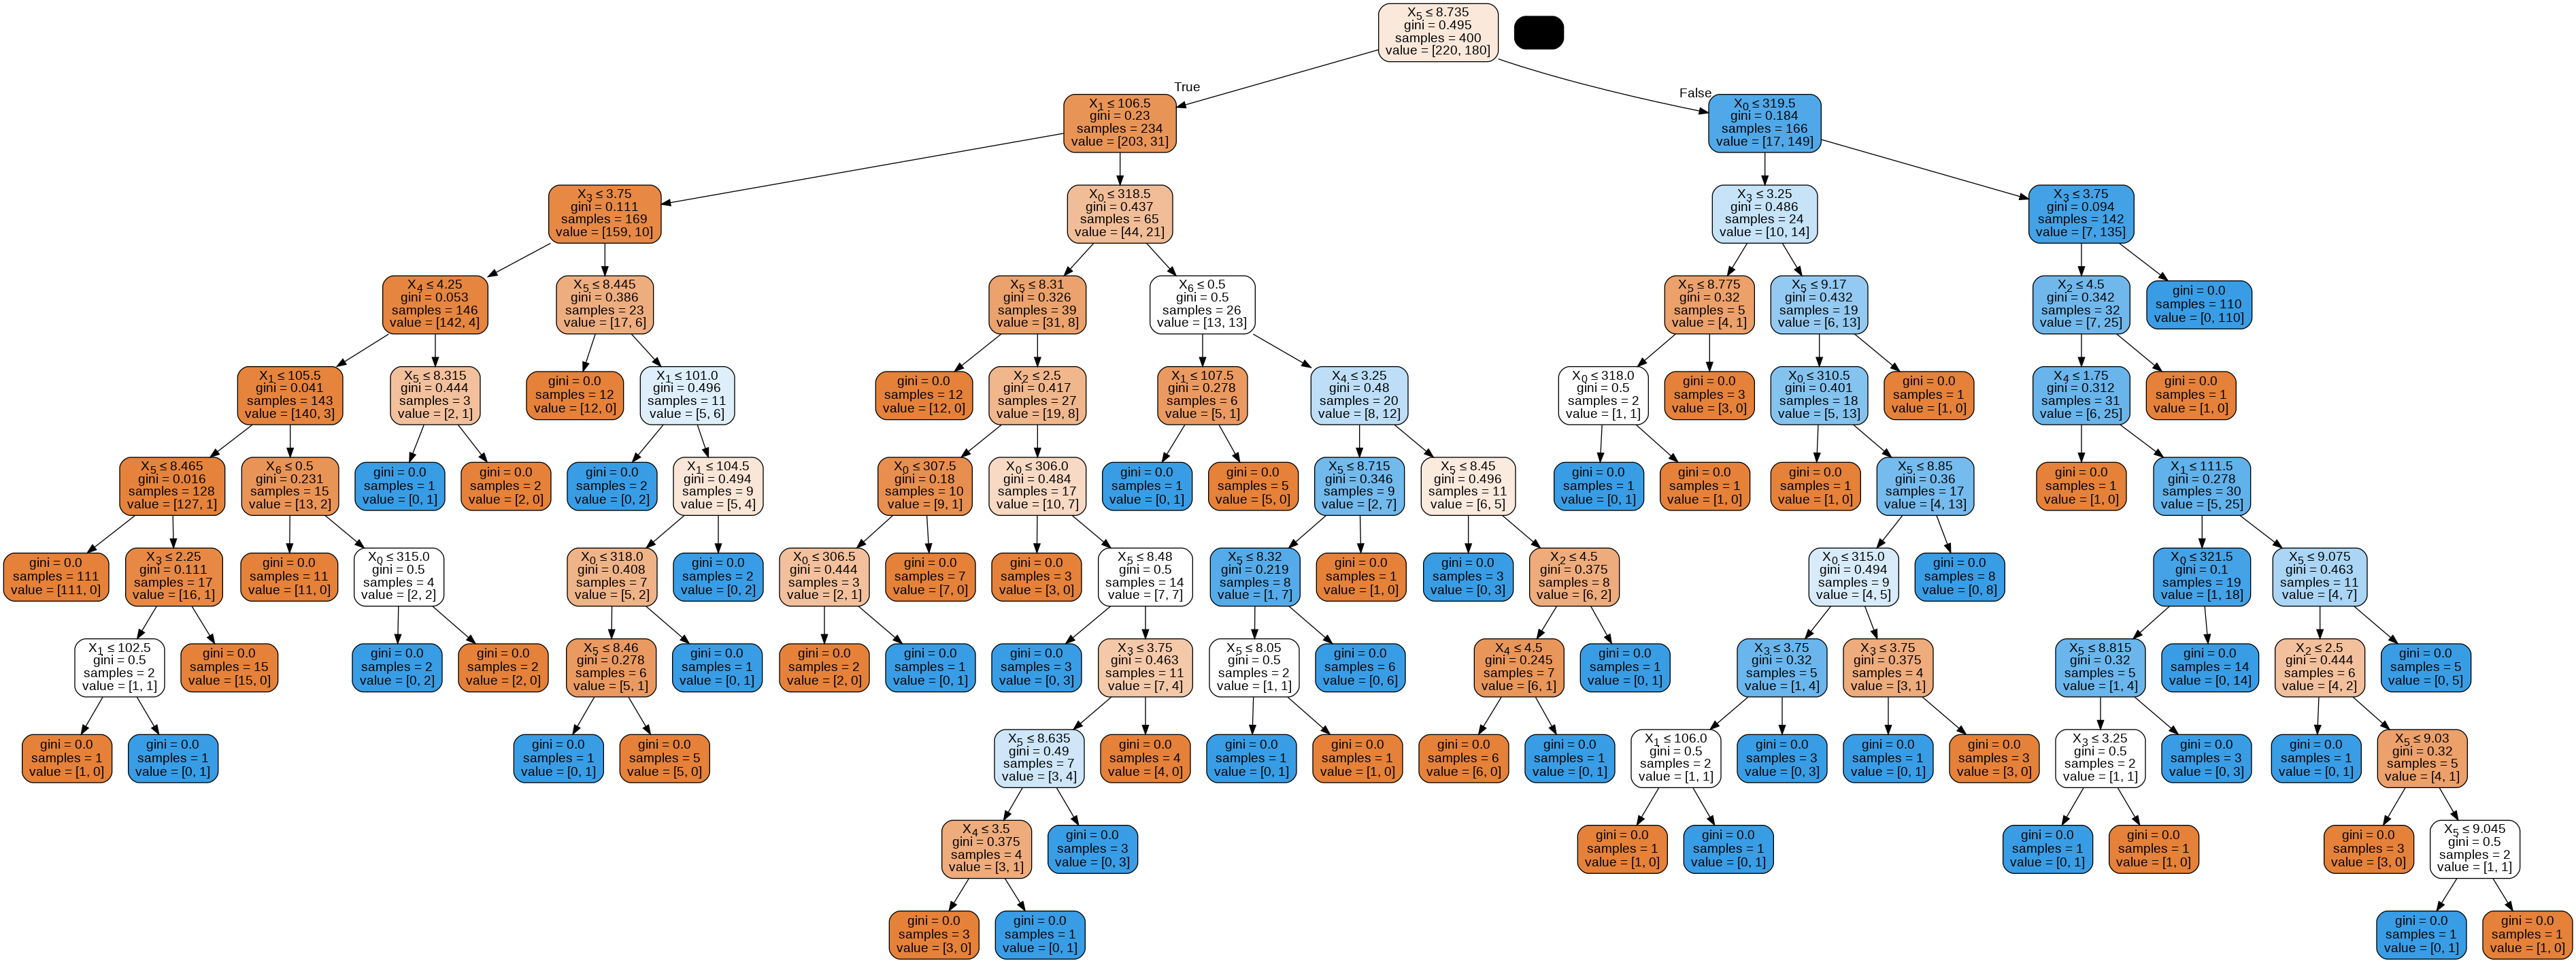

In [52]:
display_tree(dt)

Model overfit, using a smaller one for best results. We can see it overfits as it is 10 levels deep and score is 1.

In [53]:
dt_smaller = DecisionTreeClassifier(max_depth=3,
min_samples_leaf=10, min_samples_split=10)
dt_smaller.fit(features, labels)
dt_smaller.predict([[320, 110, 3, 4.0, 3.5, 8.9, 0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [54]:
dt_smaller.score(features, labels)

0.885

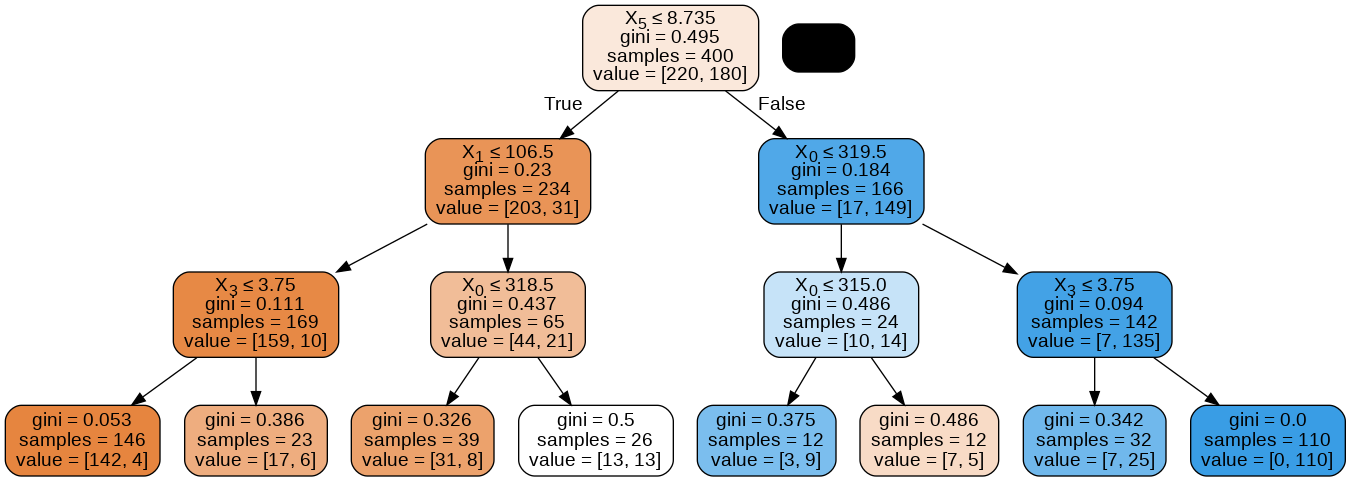

In [55]:
display_tree(dt_smaller)

To better see the effect of an overfitting model we could restrict ourself to just 2 features and created models with unbounded depth, depth=2 or depth=1, plot them and see the difference.


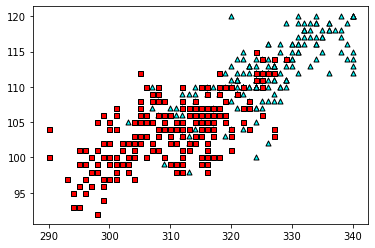

In [75]:
exams = data[['GRE Score', 'TOEFL Score']]

plot_points(exams, labels, size_of_points=25)


Unbounded depth

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


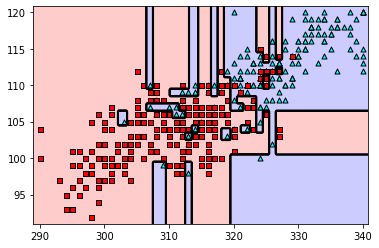

0.93

In [86]:
crazy_dt_exams = DecisionTreeClassifier()
crazy_dt_exams.fit(exams, labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, splitter='best')

plot_model(exams, labels, crazy_dt_exams, size_of_points=25)
display_tree(crazy_dt_exams)
crazy_dt_exams.score(exams, labels)

Depth 2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


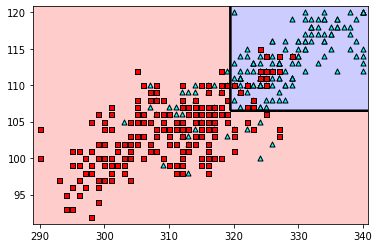

0.8625

In [87]:
dt_exams = DecisionTreeClassifier(max_depth=2)
dt_exams.fit(exams, labels)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

plot_model(exams, labels, dt_exams, size_of_points=25)
display_tree(dt_exams)
dt_exams.score(exams, labels)

Depth 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


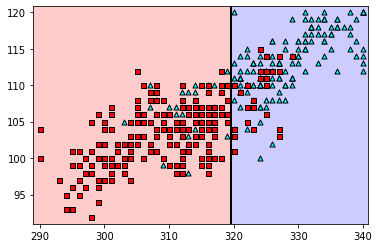

0.8525

In [88]:
simpler_dt_exams = DecisionTreeClassifier(max_depth=1)
simpler_dt_exams.fit(exams, labels)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
plot_model(exams, labels, simpler_dt_exams, size_of_points=25)
display_tree(simpler_dt_exams)
simpler_dt_exams.score(exams, labels)

# Regression decision tree

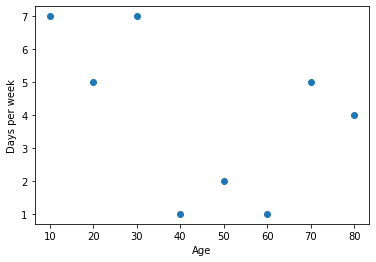

In [56]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,7,1,2,1,5,4]

plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [57]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

In [58]:
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=2)

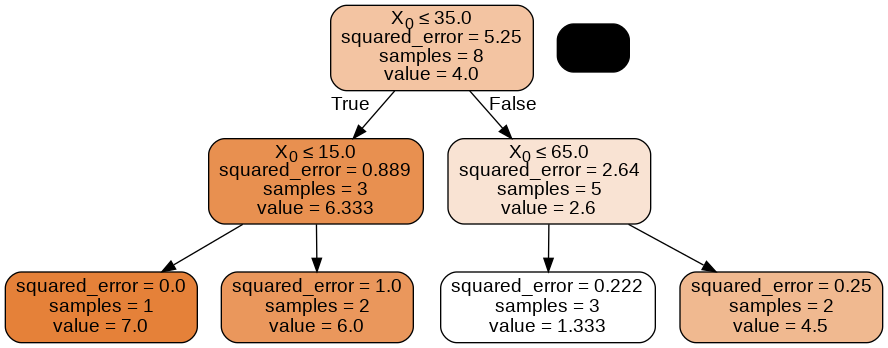

In [59]:
display_tree(dt_regressor)

In [60]:
for i in range(0,9):
    left = np.array(labels[:i])
    right = np.array(labels[i:])
    print("*****")
    print(left, right)
    print(np.mean(left), np.mean(right))
    left_tse = left-np.mean(left)
    right_tse = right-np.mean(right)
    print(1/8*(np.dot(left_tse, left_tse) + np.dot(right_tse, right_tse)))

*****
[] [7 5 7 1 2 1 5 4]
nan 4.0
5.25
*****
[7] [5 7 1 2 1 5 4]
7.0 3.5714285714285716
3.9642857142857144
*****
[7 5] [7 1 2 1 5 4]
6.0 3.3333333333333335
3.916666666666667
*****
[7 5 7] [1 2 1 5 4]
6.333333333333333 2.6
1.9833333333333334
*****
[7 5 7 1] [2 1 5 4]
5.0 3.0
4.25
*****
[7 5 7 1 2] [1 5 4]
4.4 3.3333333333333335
4.983333333333333
*****
[7 5 7 1 2 1] [5 4]
3.8333333333333335 4.5
5.166666666666667
*****
[7 5 7 1 2 1 5] [4]
4.0 4.0
5.25
*****
[7 5 7 1 2 1 5 4] []
4.0 nan
5.25


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [61]:
1/8*(
    (7-3.833)**2 +
    (5-3.833)**2 +
    (7-3.833)**2 +
    (1-3.833)**2 +
    (2-3.833)**2 +
    (1-3.833)**2 +
    (5-4.5)**2 +
    (4-4.5)**2)

5.16666675

In [62]:
np.array([7,5,7,1,2,1,5,4]).mean()

4.0